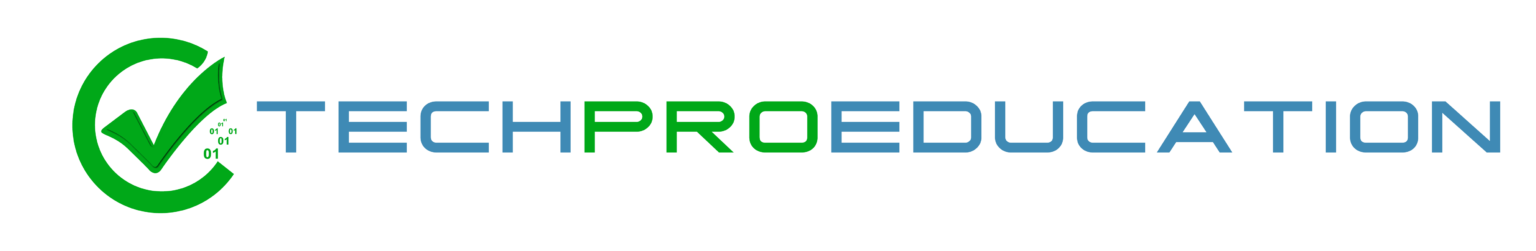

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.  **The idea is that if two samples have the same(or similar) fnlwgt they have similar characteristics, demographically speaking. **Say sample 7,12 and 33 are having similar fnlwgt values they are more likely to be of the same race, similar educational and social background, etc.. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
from yellowbrick.classifier import ClassPredictionError
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [4]:
df = pd.read_csv("adult.csv")

In [5]:
df.shape

(32561, 15)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df[df == '?'] = np.nan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.workclass.value_counts(dropna = False)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df.occupation.value_counts(dropna = False)

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
NaN                  1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
df["native.country"].value_counts(dropna = False)

United-States                 29170
Mexico                          643
NaN                             583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [12]:
df["workclass"].fillna(df["workclass"].mode()[0], inplace=True)

In [13]:
df["occupation"].fillna("Other-service", inplace=True)

In [14]:
df["native.country"].fillna(df["native.country"].mode()[0], inplace=True)

In [15]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [16]:
df=pd.get_dummies(df, drop_first=True)

In [17]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   fnlwgt                                     32561 non-null  int64
 2   education.num                              32561 non-null  int64
 3   capital.gain                               32561 non-null  int64
 4   capital.loss                               32561 non-null  int64
 5   hours.per.week                             32561 non-null  int64
 6   income                                     32561 non-null  int64
 7   workclass_Local-gov                        32561 non-null  uint8
 8   workclass_Never-worked                     32561 non-null  uint8
 9   workclass_Private                          32561 non-null  uint8
 10  workclass_Self-emp-inc                     325

In [19]:
df.duplicated().sum() 

25

In [20]:
df = df.drop_duplicates()

In [21]:
df.duplicated().sum() 

0

In [22]:
df["income"].value_counts()  

0    24697
1     7839
Name: income, dtype: int64

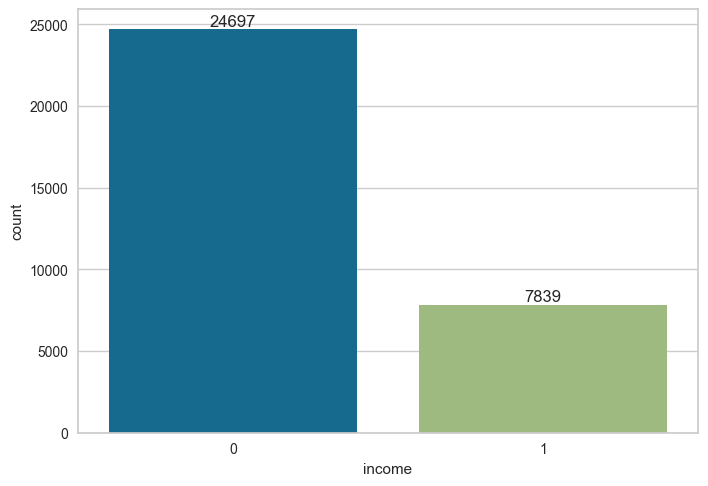

In [23]:
ax= sns.countplot(df["income"])
ax.bar_label(ax.containers[0]); 

# Logistic Regression

### Train | Test Split and Scaling

In [24]:
X=df.drop(["income"], axis=1)
y=df["income"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Logistic Regression with Pipeline

In [26]:
scaler =StandardScaler()

In [27]:
log_model = LogisticRegression()

In [28]:
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) 

In [29]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

### Model Performance

**accuracy:** gerçek değerlerin ne kadarını doğru bildim

**recall(sensitivity):** pozitifleri yakalama oranı (1'leri yakalama oranı)

**specificity:** negatifleri yakalama oranı, recall'un tersi; 0'ları yakalama oranı

**precision:** pozitif dediklerimden kaçını isabet ettirebildim

**precision:** modelimin 1 dediklerinin ne kadarı gerçek hayatta 1

**precision:** modelimin tahmin gücü

**recall:** gerçek hayatta 1 olanların ne kadarına modelim 1 dedi

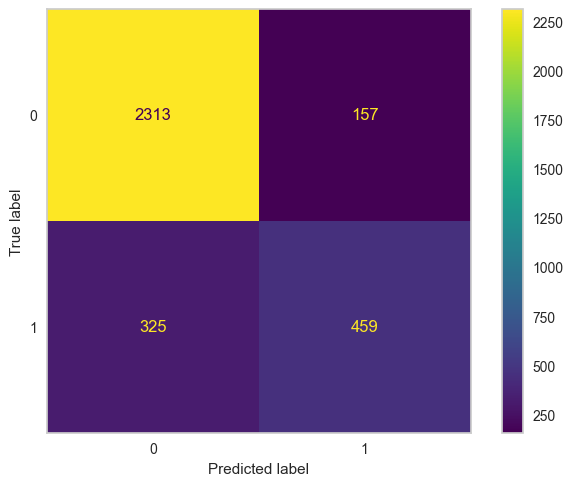

In [31]:
plot_confusion_matrix(log_pipe, X_test, y_test)
plt. grid(False);

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# hem train hem de test seti scorlarını gözlemleyebilmek için eval_metric fornksiyonumuzu tanımlıyoruz.

In [33]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[2313  157]
 [ 325  459]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2470
           1       0.75      0.59      0.66       784

    accuracy                           0.85      3254
   macro avg       0.81      0.76      0.78      3254
weighted avg       0.85      0.85      0.85      3254


Train_Set
[[20706  1521]
 [ 2786  4269]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     22227
           1       0.74      0.61      0.66      7055

    accuracy                           0.85     29282
   macro avg       0.81      0.77      0.79     29282
weighted avg       0.85      0.85      0.85     29282



### GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# pipeline for logistic regression

model = Pipeline([("scaler",scaler),("log_model",log_model)]) 

# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"] 

# -1 ile 5 arasında 20 tane C değeri elde etmek için 
# C arttıkça regülarizasyon düşer, alphanın tersi olarak
# C için np.logspace kullanmanın nedeni, düzenlileştirmenin optimal değerinin genellikle belirli bir aralıkta olmamasıdır.
# Bu nedenle, geniş bir aralıkta farklı değerleri denemek ve en iyi sonucu veren değeri bulmak için logaritmik bir ölçekte
# değerler oluşturmak mantıklıdır.
C = np.logspace(-1, 5, 20) 

# balanced: sınıf ağırlıkları dengeli, None: sınıf ağırlığı yok
class_weight= ["balanced", None] 
# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# solver ın dört değeri
solver = ["liblinear", "sag", "saga"] #"lbfgs", 

# penalty, C, class_weight ve solver'ın tüm kombinasyonlarını elde etmek için
param_grid = {"log_model__penalty" : penalty,
              "log_model__C" : C, #[C,1]
              "log_model__class_weight":class_weight,
              "log_model__solver":solver} 

# en iyi modeli elde etmek için
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          scoring = 'f1',   # Default olarak 1 sınıfının scorunu max. eder    
                          n_jobs = -1) # bütün işlemciler burda çalışsın diye

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [36]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['liblinear', 'sag', 'saga']},
             scoring='f1')

In [37]:
grid_model.best_params_

{'log_model__C': 0.1,
 'log_model__class_weight': 'balanced',
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [38]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  

Test_Set
[[1984  486]
 [ 142  642]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2470
           1       0.57      0.82      0.67       784

    accuracy                           0.81      3254
   macro avg       0.75      0.81      0.77      3254
weighted avg       0.85      0.81      0.82      3254


Train_Set
[[17791  4436]
 [ 1039  6016]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87     22227
           1       0.58      0.85      0.69      7055

    accuracy                           0.81     29282
   macro avg       0.76      0.83      0.78     29282
weighted avg       0.86      0.81      0.82     29282



### Finding Best Threshold for the most balanced score between recall and precision

In [41]:
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

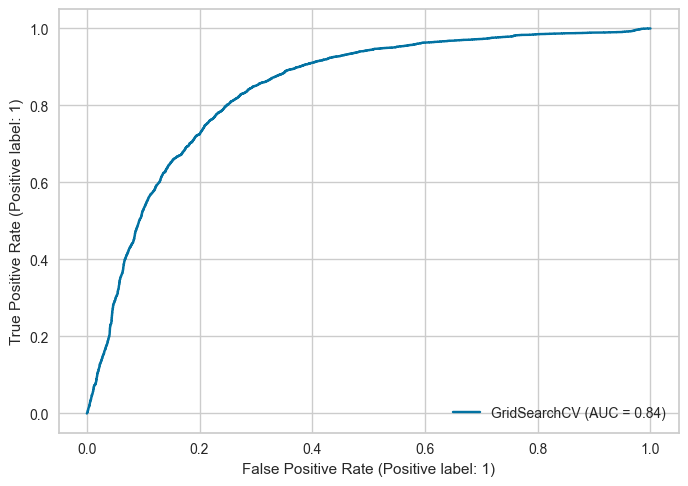

In [44]:
plot_roc_curve(grid_model, X_train_scaled, y_train);  
plt.show()

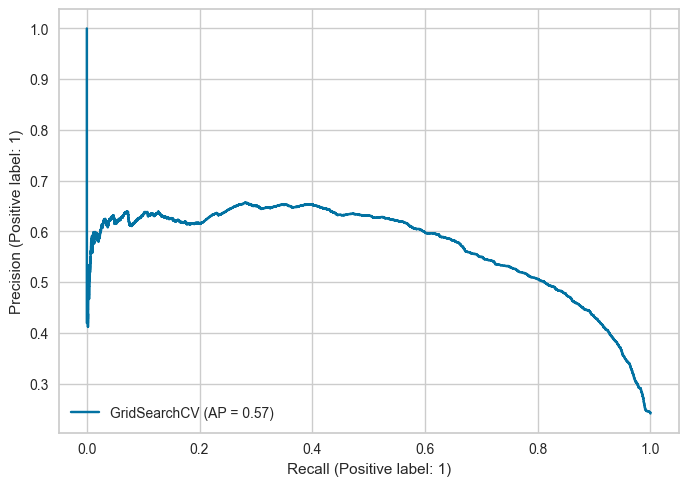

In [45]:
plot_precision_recall_curve(grid_model, X_train_scaled, y_train);
plt.show()

In [46]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.5707272994351316

In [47]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.004638992690034698

In [48]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0) 

In [49]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[1796  674]
 [ 149  635]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      2470
           1       0.49      0.81      0.61       784

    accuracy                           0.75      3254
   macro avg       0.70      0.77      0.71      3254
weighted avg       0.82      0.75      0.76      3254



In [50]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[16159  6068]
 [ 1208  5847]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     22227
           1       0.49      0.83      0.62      7055

    accuracy                           0.75     29282
   macro avg       0.71      0.78      0.72     29282
weighted avg       0.82      0.75      0.77     29282



In [52]:
### Grid_model

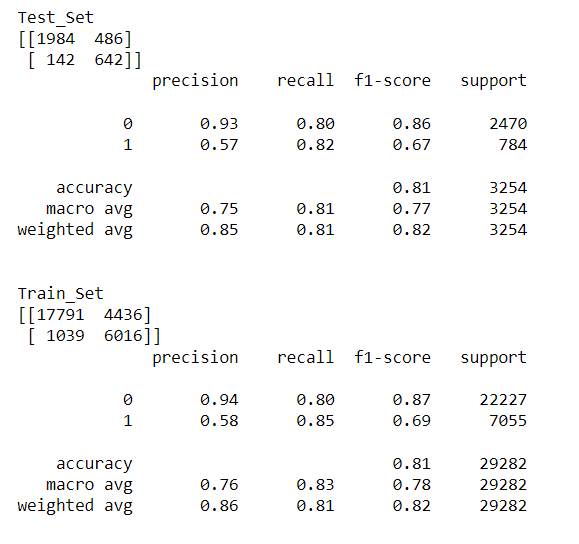

In [51]:
### log_model

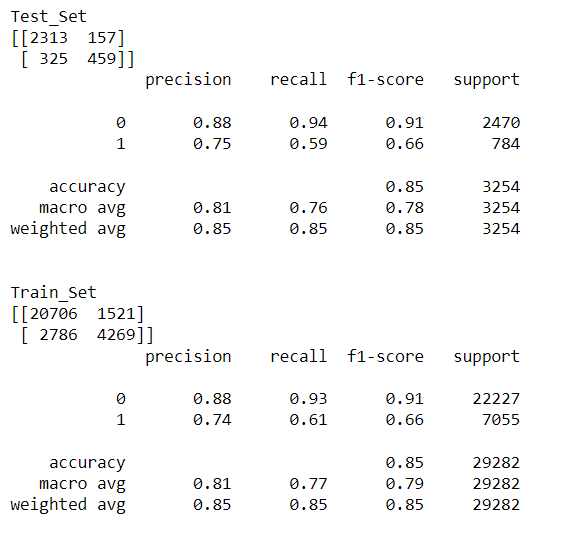

# K-Nearest Neighbors (KNN) Classification

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [30]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn_model.predict(X_test_scaled)

In [32]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [33]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

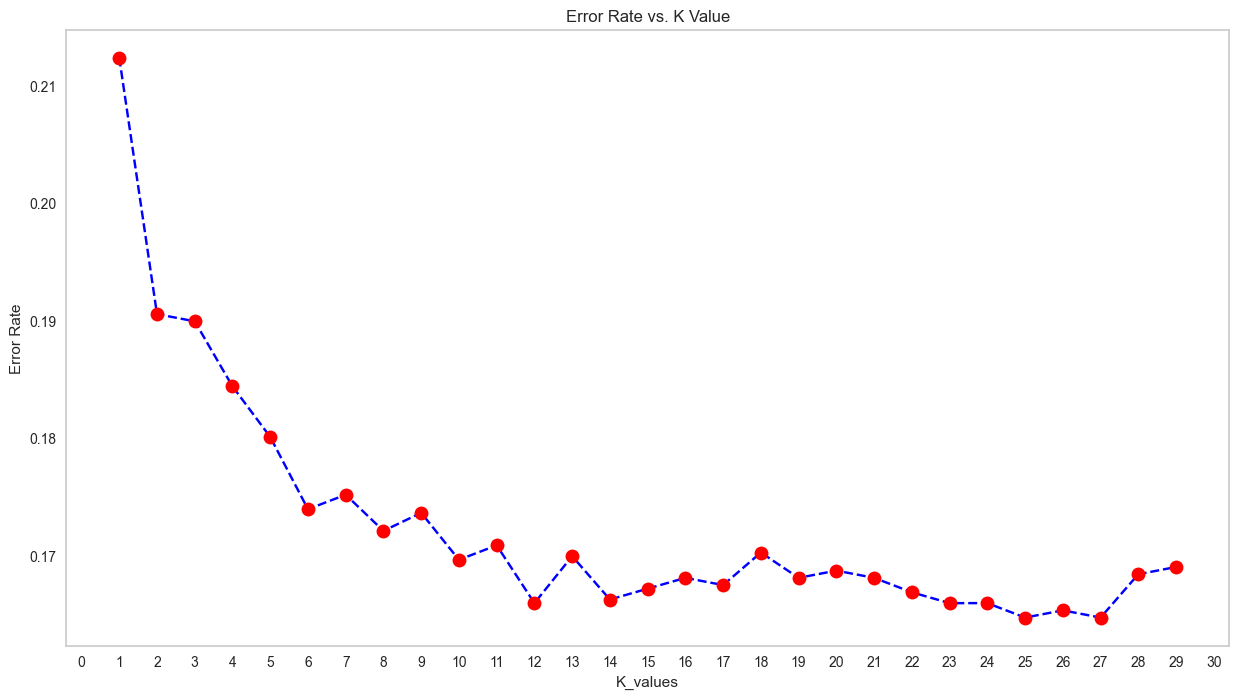

In [34]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt. grid(False)
plt.xticks(range(0, 31, 1));

In [36]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[2145  325]
 [ 366  418]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2470
           1       0.56      0.53      0.55       784

    accuracy                           0.79      3254
   macro avg       0.71      0.70      0.70      3254
weighted avg       0.78      0.79      0.79      3254


Train_Set

[[22227     0]
 [    1  7054]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22227
           1       1.00      1.00      1.00      7055

    accuracy                           1.00     29282
   macro avg       1.00      1.00      1.00     29282
weighted avg       1.00      1.00      1.00     29282



In [38]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train_scaled,y_train)
print('WITH K=6\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=6

Test_Set

[[2318  152]
 [ 414  370]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2470
           1       0.71      0.47      0.57       784

    accuracy                           0.83      3254
   macro avg       0.78      0.71      0.73      3254
weighted avg       0.81      0.83      0.81      3254


Train_Set

[[21328   899]
 [ 2963  4092]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     22227
           1       0.82      0.58      0.68      7055

    accuracy                           0.87     29282
   macro avg       0.85      0.77      0.80     29282
weighted avg       0.86      0.87      0.86     29282



In [39]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train_scaled,y_train)
print('WITH K=12\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=12

Test_Set

[[2310  160]
 [ 380  404]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2470
           1       0.72      0.52      0.60       784

    accuracy                           0.83      3254
   macro avg       0.79      0.73      0.75      3254
weighted avg       0.82      0.83      0.82      3254


Train_Set

[[20985  1242]
 [ 3074  3981]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     22227
           1       0.76      0.56      0.65      7055

    accuracy                           0.85     29282
   macro avg       0.82      0.75      0.78     29282
weighted avg       0.85      0.85      0.84     29282



## Pipeline

In [40]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

In [41]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [42]:
pipe_model = Pipeline(steps=operations)

In [43]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [44]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

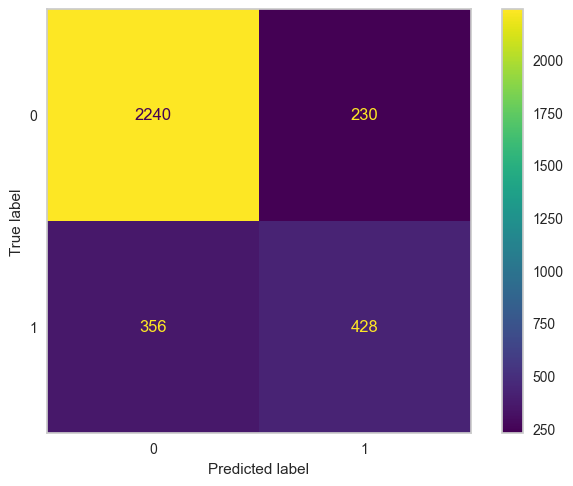

In [45]:
plot_confusion_matrix(pipe_model, X_test, y_test)
plt. grid(False); 

### GridSearch on Pipeline

In [46]:
param_grid = {'knn__n_neighbors': range(1,20)}
pipe_model = Pipeline(steps=operations)

In [47]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'f1')

In [48]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)}, scoring='f1')

In [49]:
pipe_grid.best_params_

{'knn__n_neighbors': 7}

In [50]:
print('WITH K=7\n')
eval_metric(pipe_grid, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=7

Test_Set

[[2372   98]
 [ 561  223]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2470
           1       0.69      0.28      0.40       784

    accuracy                           0.80      3254
   macro avg       0.75      0.62      0.64      3254
weighted avg       0.78      0.80      0.76      3254


Train_Set

[[21500   727]
 [ 4870  2185]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.88     22227
           1       0.75      0.31      0.44      7055

    accuracy                           0.81     29282
   macro avg       0.78      0.64      0.66     29282
weighted avg       0.80      0.81      0.78     29282



### CrossValidate on Pipeline

In [50]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=97))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.697528
test_recall       0.518925
test_f1           0.594847
test_accuracy     0.829725
dtype: float64

# Decision Tree Classification

In [3]:
df = pd.read_csv("adult.csv")

In [4]:
df[df == '?'] = np.nan

In [5]:
df["workclass"].fillna(df["workclass"].mode()[0], inplace=True)

In [6]:
df["occupation"].fillna("Other-service", inplace=True)

In [7]:
df["native.country"].fillna(df["native.country"].mode()[0], inplace=True)

In [8]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [9]:
df.duplicated().sum() 

25

In [10]:
df = df.drop_duplicates()

## Ordinal Encoder

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
X=df.drop(["income"], axis=1)
y=df["income"]

In [13]:
cat = X.select_dtypes("object").columns
cat

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [14]:
X[cat]

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,Private,HS-grad,Widowed,Other-service,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,Private,Some-college,Widowed,Other-service,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States


In [15]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

# genel kural btün kategorik datayı numeriğe çevirmemeiz gerekir. bütün data daki kategorikleri numeriğe çevirir.

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3.0,77053,11.0,9,6.0,7.0,1.0,4.0,0.0,0,4356,40,38.0
1,82,3.0,132870,11.0,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0
2,66,3.0,186061,15.0,10,6.0,7.0,4.0,2.0,0.0,0,4356,40,38.0
3,54,3.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0
4,41,3.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
DT_model = DecisionTreeClassifier(random_state=101)

In [19]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [20]:
y_pred = DT_model.predict(X_test)

In [21]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

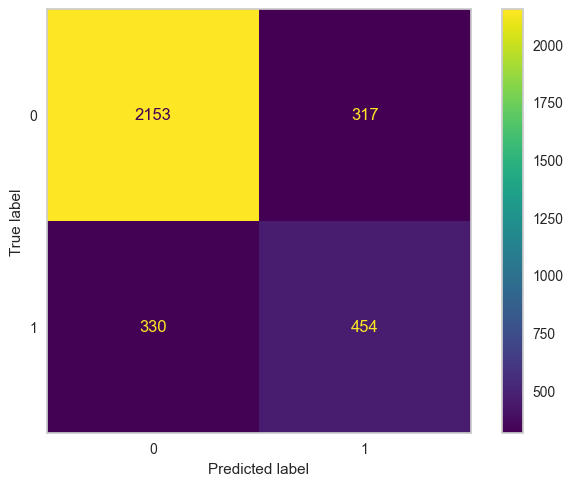

In [22]:
plot_confusion_matrix(DT_model,X_test,y_test)
plt. grid(False)
plt.show()

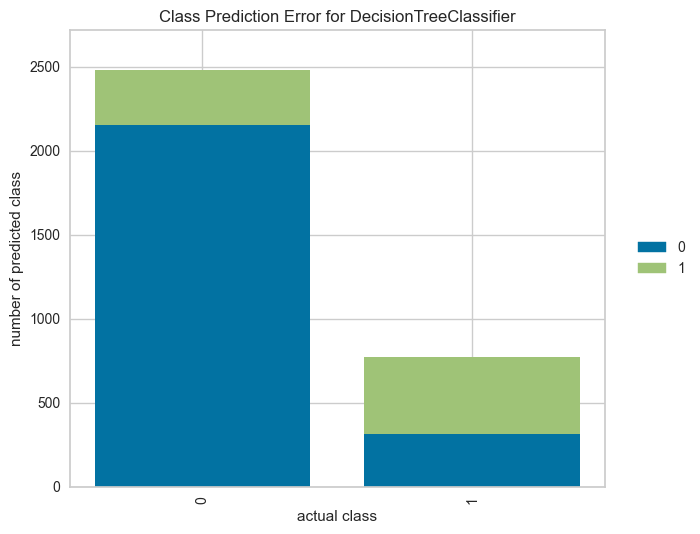

In [23]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

# yukarıdaki heatmap'in farklı grafiğinin yorumlanması gibi hataların hangi sınıfa ait olduğunu veriyor 

In [24]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[2153  317]
 [ 330  454]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2470
           1       0.59      0.58      0.58       784

    accuracy                           0.80      3254
   macro avg       0.73      0.73      0.73      3254
weighted avg       0.80      0.80      0.80      3254


Train_Set
[[22227     0]
 [    1  7054]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22227
           1       1.00      1.00      1.00      7055

    accuracy                           1.00     29282
   macro avg       1.00      1.00      1.00     29282
weighted avg       1.00      1.00      1.00     29282



## Feature Importances

In [25]:
DT_model.feature_importances_

array([0.12094015, 0.034212  , 0.20301678, 0.01279496, 0.11600762,
       0.00557044, 0.06059305, 0.19720925, 0.01337632, 0.00330365,
       0.11582823, 0.0371569 , 0.0669304 , 0.01306024])

In [26]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
sex,0.003304
marital.status,0.005570
education,0.012795
native.country,0.013060
race,0.013376
workclass,0.034212
capital.loss,0.037157
occupation,0.060593
hours.per.week,0.066930
capital.gain,0.115828


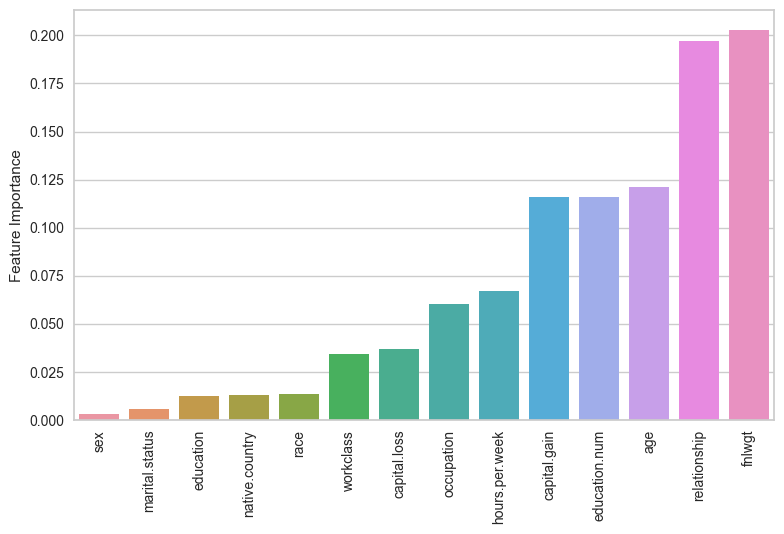

In [27]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Find Best Parameters

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
model = DecisionTreeClassifier(random_state=101)

In [30]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [31]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1',
                          cv=10,
                          n_jobs = -1)

In [32]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [33]:
grid_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [34]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2305  165]
 [ 343  441]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2470
           1       0.73      0.56      0.63       784

    accuracy                           0.84      3254
   macro avg       0.80      0.75      0.77      3254
weighted avg       0.84      0.84      0.84      3254


Train_Set
[[21057  1170]
 [ 2400  4655]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     22227
           1       0.80      0.66      0.72      7055

    accuracy                           0.88     29282
   macro avg       0.85      0.80      0.82     29282
weighted avg       0.87      0.88      0.87     29282



# CONCLUSION

## Logistic Regression

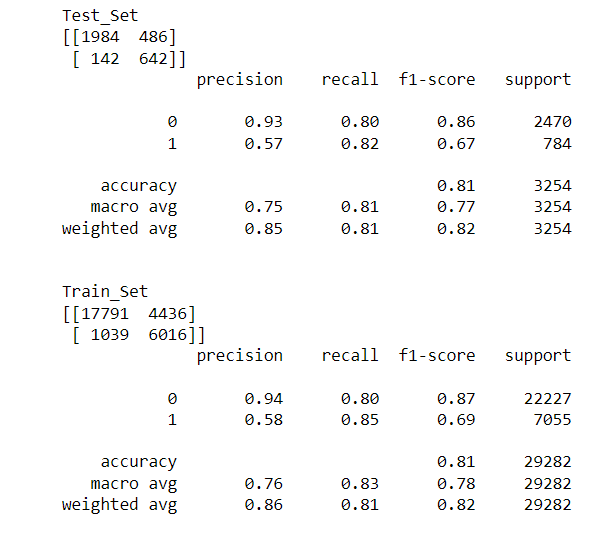

## KNN

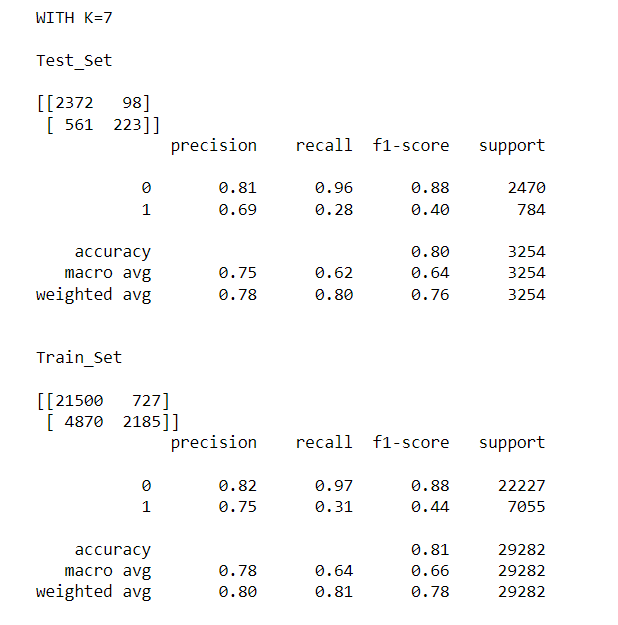

## Decision Tree 

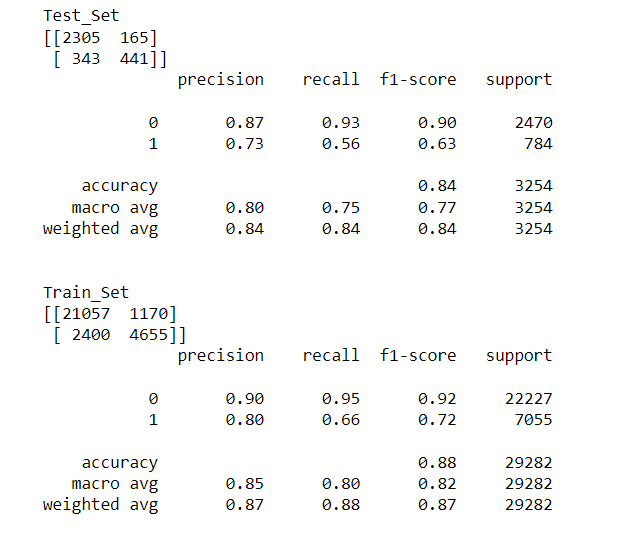

#### Datam unbalanced olduğu için f1 skorlarona göre yorumlayabilirim aynı zamanda target feature değerlerimde 0 ve 1 değerlerinin birbirine ait üstünlüğü olmadığı, ve target 1 değerleri kanser veya benzeri bir değer ifade etmediği için recall değerim f1 skoruna göre biraz değersiz kalıyor.

#### f1 skorlarına göre yorumladığım zaman Decision Tree modelimi tercih ederim.